Keras_functional _api 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:,-6:].shape

(11610, 6)

In [ ]:

inputA = keras.layers.Input(shape=X_train[:,:5].shape[1])#first 5
inputB = keras.layers.Input(shape=X_train[:,-6:].shape[1]) # last 6
hidden1 = keras.layers.Dense(30, activation="relu")(inputA)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inputB, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[inputA,inputB], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   180       ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                              

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [ ]:
history= model.fit((X_train[:,:5],X_train[:,-6:]), y_train, epochs=20,validation_data=((X_valid[:,:5],X_valid[:,-6:]), y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.9987 - val_loss: 0.8753
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7954 - val_loss: 0.7240
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7094 - val_loss: 0.6686
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6642 - val_loss: 0.6315
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6318 - val_loss: 0.6049
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6071 - val_loss: 0.5836
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5882 - val_loss: 0.5674
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5727 - val_loss: 0.5533
Epoch 9/20
363/363 [==============================] - 3s 9ms/step - loss: 0.5603 - val_loss: 0.5430
Epoch 10/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5499 - val_loss: 0.5332

In [ ]:
mse_test = model.evaluate((X_test[:,:5],X_test[:,-6:]), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4893


In [ ]:
mse_test

0.4892865717411041

In [ ]:
predictions = model.predict((X_test[:, :5], X_test[:, -6:]))


162/162 [==============================] - 1s 4ms/step


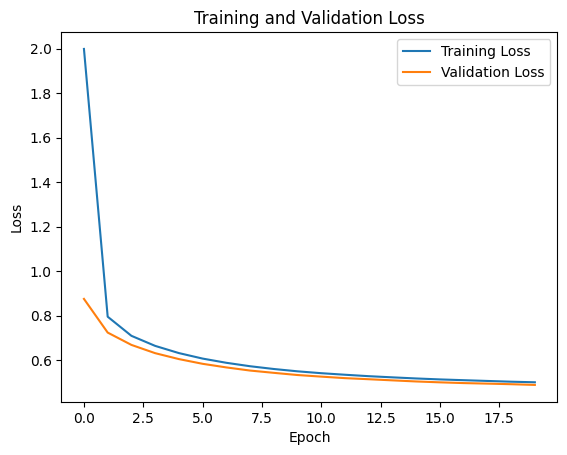

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()